## Pumpkin Varieties and Color

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

Let's look at the relationship between color and variety

In [3]:
import pandas as pd
import numpy as np

full_pumpkins = pd.read_csv('../data/US-pumpkins.csv')

full_pumpkins.head()

# I detected the column headers  original had trailing spaces and I deleted them using LibreOffice
# columns_headers = full_pumpkins.columns.tolist()
# print(len(columns_headers[0]))


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,,Unnamed: 25
0,BALTIMORE,,24 inch bins,NaN,,,4/29/17,270.0,280.0,270,...,,,,,,,E,,,NaN
1,BALTIMORE,,24 inch bins,,,,5/6/17,270.0,280.0,270,...,,,,,,,E,,,NaN
2,BALTIMORE,,24 inch bins,HOWDEN TYPE,,,9/24/16,160.0,160.0,160,...,,,,,,,N,,,NaN
3,BALTIMORE,,24 inch bins,HOWDEN TYPE,,,9/24/16,160.0,160.0,160,...,,,,,,,N,,,NaN
4,BALTIMORE,,24 inch bins,HOWDEN TYPE,,,11/5/16,90.0,100.0,90,...,,,,,,,N,,,NaN


In [4]:
# Select the columns we want to use
columns_to_select = ['City Name','Package','Variety', 'Origin','Item Size', 'Color']
pumpkins = full_pumpkins.loc[:, columns_to_select]

pumpkins.head()

,City Name,Package,Variety,Origin,Item Size,Color
0,BALTIMORE,24 inch bins,NaN,MARYLAND,lge,
1,BALTIMORE,24 inch bins,,MARYLAND,lge,
2,BALTIMORE,24 inch bins,HOWDEN TYPE,DELAWARE,med,ORANGE
3,BALTIMORE,24 inch bins,HOWDEN TYPE,VIRGINIA,med,ORANGE
4,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE


In [5]:
# As dataset having lot of extra spaces in cell so lets remove them using strip() function

pumpkins = pumpkins.replace(r'^\s*$', np.nan, regex=True)

# Drop rows with missing values
pumpkins.dropna(inplace=True)

# Print out the first few rows
pumpkins.head(10)

,City Name,Package,Variety,Origin,Item Size,Color
2,BALTIMORE,24 inch bins,HOWDEN TYPE,DELAWARE,med,ORANGE
3,BALTIMORE,24 inch bins,HOWDEN TYPE,VIRGINIA,med,ORANGE
4,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
5,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
6,BALTIMORE,36 inch bins,HOWDEN TYPE,MARYLAND,med,ORANGE
7,BALTIMORE,36 inch bins,HOWDEN TYPE,PENNSYLVANIA,lge,ORANGE
8,BALTIMORE,36 inch bins,HOWDEN TYPE,MARYLAND,med,ORANGE
9,BALTIMORE,36 inch bins,HOWDEN TYPE,PENNSYLVANIA,lge,ORANGE
10,BALTIMORE,36 inch bins,HOWDEN TYPE,MARYLAND,med,ORANGE
11,BALTIMORE,36 inch bins,HOWDEN TYPE,PENNSYLVANIA,lge,ORANGE


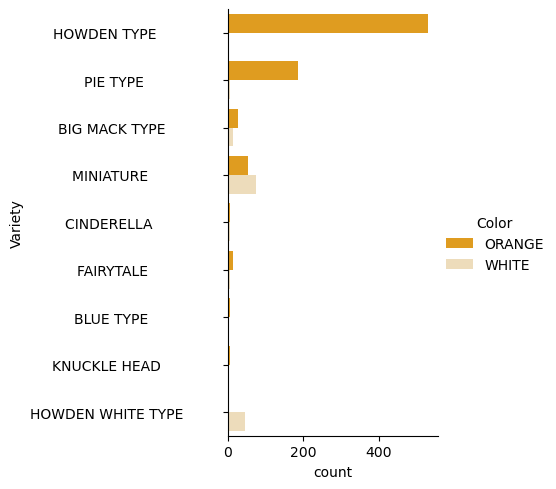

In [13]:
import seaborn as sns

# Remove leading and trailing whitespace characters from the Color column
pumpkins['Color'] = pumpkins['Color'].str.strip()

# Remove leading and trailing whitespace characters from the Color column
pumpkins['Item Size'] = pumpkins['Item Size'].str.strip()

# Specify colors for each value of the hue variable
palette = {
    'ORANGE': 'orange',
    'WHITE': 'wheat',
}

# Plot the bar plot
sns.catplot(
    data=pumpkins, y="Variety", hue="Color", kind="count",
    palette=palette,
)


### Logistic Regression Requires Data only in numerical values

In [14]:
# Encode the 'Item Size' column using ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

item_size_categories = [['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']]
ordinal_features = ['Item Size']
ordinal_encoder = OrdinalEncoder(categories=item_size_categories)


In [15]:
# Encode all the other features using one-hot encoding
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['City Name', 'Package', 'Variety', 'Origin']
categorical_encoder = OneHotEncoder(sparse_output=False)



In [16]:
# Transform File Columns
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[
    ('ord', ordinal_encoder, ordinal_features),
    ('cat', categorical_encoder, categorical_features)
])

# Get the encoded features as a pandas DataFrame
ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(pumpkins)
encoded_features.head()


,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_MICHIGAN,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Encode the 'Color' column using label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins['Color'])
encoded_pumpkins = encoded_features.assign(Color=encoded_label)
encoded_pumpkins.head()

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA,Color
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [18]:
# Compare the mapping between the encoded values and the original values
list(label_encoder.inverse_transform([0, 1]))

['ORANGE', 'WHITE']

c:\ProgramData\anaconda3\envs\Python_3-12-1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\envs\Python_3-12-1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


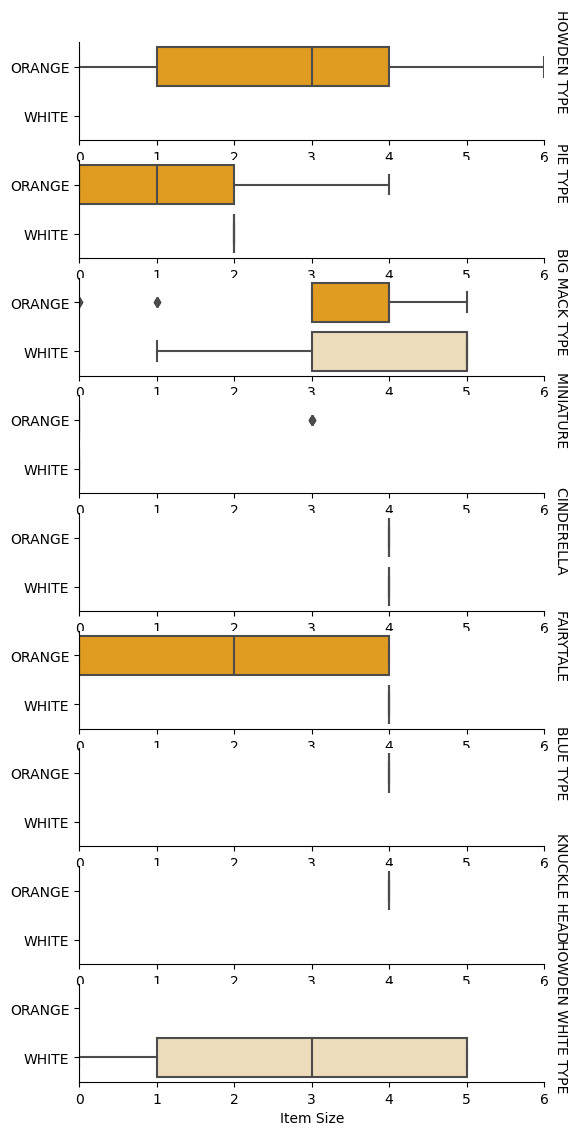

In [21]:
# Visualize the new Data Set

palette = {
    'ORANGE': 'orange',
    'WHITE': 'wheat',
}

# We need the encoded Item Size column to use it as the x-axis values in the plot
pumpkins['Item Size'] = encoded_pumpkins['ord__Item Size']

g = sns.catplot(
    data=pumpkins,
    x='Item Size', y="Color", row="Variety",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4, palette=palette,
)

# Defining axis labels
g.set(xlabel="Item Size", ylabel="").set(xlim=(0,6))
g.set_titles(row_template="{row_name}")



C:\Users\dgane\AppData\Local\Temp\ipykernel_7932\3229857437.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x="Color", y="ord__Item Size", data=encoded_pumpkins, palette=palette)
c:\ProgramData\anaconda3\envs\Python_3-12-1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\envs\Python_3-12-1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\envs\Python_3-12-1\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use strippl

<Axes: xlabel='Color', ylabel='ord__Item Size'>

c:\ProgramData\anaconda3\envs\Python_3-12-1\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\envs\Python_3-12-1\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


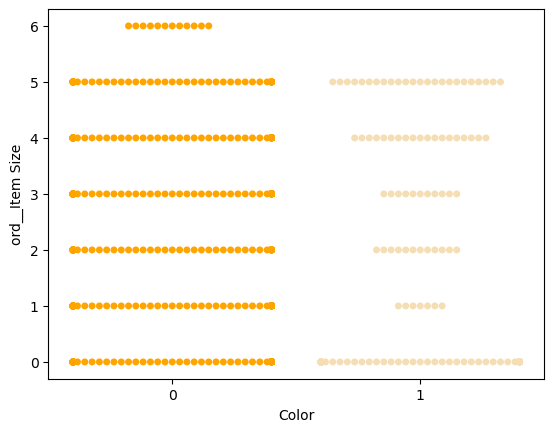

In [23]:
palette = {
    '0': 'orange',
    '1': 'wheat',
}

sns.swarmplot(x="Color", y="ord__Item Size", data=encoded_pumpkins, palette=palette)

In [24]:
# Split the dataset into features and encoded label
from sklearn.model_selection import train_test_split

# X is the encoded features
X = encoded_pumpkins[encoded_pumpkins.columns.difference(['Color'])]

# y is the encoded label
y = encoded_pumpkins['Color']

In [25]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [26]:
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model on the pumpkin dataset
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)



In [27]:
# Evaluate the model and print the results
print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('F1 score: ', f1_score(y_test, predictions))



              precision    recall  f1-score   support

           0       0.94      0.98      0.96       166
           1       0.85      0.67      0.75        33

    accuracy                           0.92       199
   macro avg       0.89      0.82      0.85       199
weighted avg       0.92      0.92      0.92       199

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 1]
F1 score:  0.7457627118644068


### Understand Confusion Matrix

|     |  0   |   1  |
|-----|------|------|
|  0  |  TN  |  FP  |
|  1  |  FN  |  TP  |


* If your model predicts a pumpkin as not white and it belongs to category 'not-white' in reality we call it a true negative, shown by the top left number.
* If your model predicts a pumpkin as white and it belongs to category 'not-white' in reality we call it a false negative, shown by the bottom left number.
* If your model predicts a pumpkin as not white and it belongs to category 'white' in reality we call it a false positive, shown by the top right number.
* If your model predicts a pumpkin as white and it belongs to category 'white' in reality we call it a true positive, shown by the bottom right number.

As you might have guessed it's preferable to have a larger number of true positives and true negatives and a lower number of false positives and false negatives, which implies that the model performs better.

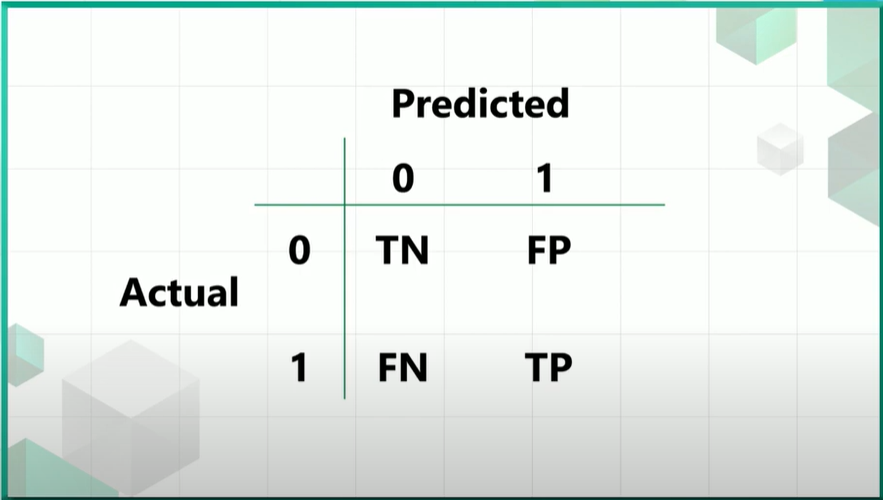

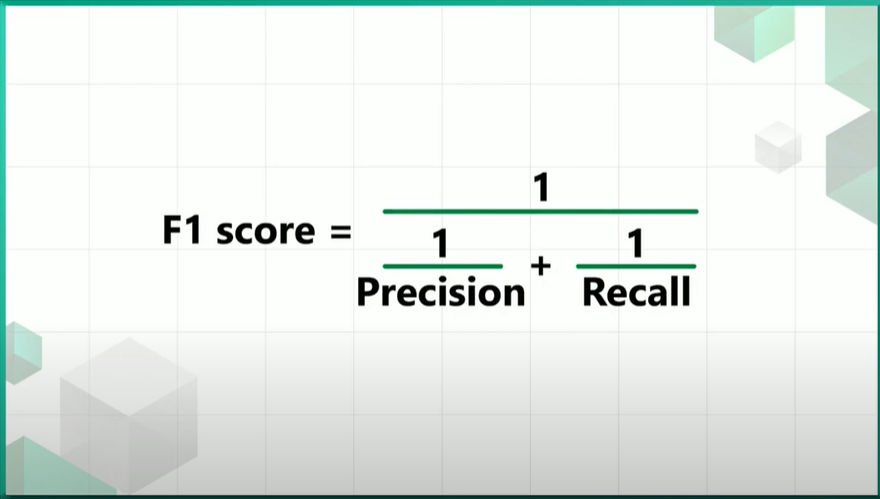

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 11,  22]], dtype=int64)

## Receiver Operating Characteristic (ROC) Curve

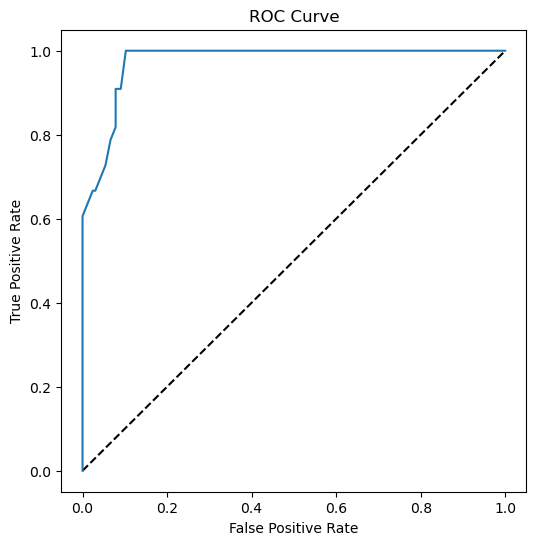

ValueError: Found input variables with inconsistent numbers of samples: [199, 1]

In [33]:
# Calculate and plot the ROC Curve

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# calculate ROC curve
fig = plt.figure(figsize=(6,6))

# Plot the diagonal 50% line
fig = plt.plot([0, 1], [0, 1], 'k--')

# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate area under the curve (ideally should be 1)
auc = roc_auc_score(y_test, y_scores[:,1])
print(auc)
